# Séries Temporais

### 0. Algumas referências:

<p>Aulas/Palestras:</p>
 - <a href="https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/video-lectures/">MIT Open Course</a><br>
 - <a href="https://www.youtube.com/watch?v=v5ijNXvlC5A&t=2643s">Modern Time Series Analysis | SciPy 2019 Tutorial | Aileen Nielsen</a><br><br>
<p>Livros:</p>
 - <a href="https://www.amazon.com.br/Practical-Time-Analysis-Aileen-Nielsen/dp/1492041653/ref=asc_df_1492041653/?tag=googleshopp00-20&linkCode=df0&hvadid=379795170134&hvpos=&hvnetw=g&hvrand=14204941210051391738&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001768&hvtargid=pla-575006547733&psc=1">Practical Time Series Analysis: Prediction with Statistics and Machine </a><br>
 - <a href="https://www.amazon.com.br/An%C3%A1lise-S%C3%A9ries-Temporais-Lineares-Univariados/dp/8521213514/ref=asc_df_8521213514/?tag=googleshopp00-20&linkCode=df0&hvadid=379712528301&hvpos=&hvnetw=g&hvrand=14502261665275545713&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=20106&hvlocphy=1001768&hvtargid=pla-810564891759&psc=1">Análise de Séries Temporais: Modelos Lineares Univariados (Volume 1) </a><br>

### 1. O que torna a série temporal especial?
Como o nome sugere, TS é uma coleção de pontos de dados coletados em intervalos de tempo constantes . Estes são analisados para determinar a tendência de longo prazo, de modo a prever o futuro ou realizar alguma outra forma de análise. Mas o que faz um TS diferente de dizer um problema de regressão regular? Existem duas coisas:

* É dependente do tempo . Portanto, a suposição básica de um modelo de regressão linear que as observações são independentes não vale neste caso.
* Juntamente com uma tendência crescente ou decrescente, a maioria dos TS tem alguma forma de tendências de sazonalidade , ou seja, variações específicas de um determinado período de tempo. Por exemplo, se você ver as vendas de uma jaqueta de lã ao longo do tempo, você invariavelmente encontrará maiores vendas nas temporadas de inverno.


Por causa das propriedades inerentes de um TS, existem várias etapas envolvidas na análise. Estas são discutidas em detalhes abaixo. Vamos começar carregando um objeto TS no Python. Vamos usar um conjunto de dados do Kaggle com informações de "stock-market" de uma empresa americana chamada ABBV.

https://www.kaggle.com/jacksoncrow/stock-market-dataset

### 2. Carregando e Manipulando Séries Temporais em Pandas

O Pandas possui bibliotecas dedicadas para manipular objetos TS, particularmente a classe datatime64 [ns]  que armazena informações de tempo e nos permite executar algumas operações realmente rápidas. Vamos começar ativando as bibliotecas necessárias e fazendo nossa primeira avaliação sobre os dados:

In [1]:
# !pip install statsmodels -U

In [2]:
# tool kit
import warnings
warnings.filterwarnings('ignore')

# algumas blibliotecas para manipulação de dados:
import math as m
import numpy as np
import pandas as pd

# algumas bibliotecas para data-viz:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# algumas bibliotecas para processamento de dados ordenados - time series:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# algumas bibliotecas para avaliação dos nossos modelos:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Vamos importar a base para o nosso notebook e dar uma primeira "olhada" nos dados:
ts_raw = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/stocks_ABBV.csv', index_col=[0])

In [4]:
# Como uma primeira análise, podemos avaliar a estrutura e o meta dos nossos dados:
ts_raw.shape

(1825, 7)

In [5]:
ts_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   Open       1825 non-null   float64
 2   High       1825 non-null   float64
 3   Low        1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Adj Close  1825 non-null   float64
 6   Volume     1825 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 114.1+ KB


In [6]:
# Agora o conteúdo:
ts_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-23,85.599998,86.550003,84.900002,85.629997,78.807220,1612800
1,2013-12-24,52.779999,52.790001,52.279999,52.360001,40.406071,1747000
2,2019-12-24,90.400002,90.400002,89.430000,89.849998,88.652267,1798800
3,2017-12-28,98.190002,98.389999,97.519997,97.790001,86.620544,1870400
4,2017-12-27,97.730003,98.230003,97.440002,98.089996,86.886284,1927300


In [7]:
ts_raw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03
mean,68.060241,68.825195,67.283118,68.080729,59.006317,7.986362e+06
std,17.968276,18.197597,17.723004,17.952057,19.158059,5.719749e+06
min,33.590000,33.900002,33.330002,33.709999,25.014784,1.612800e+06
25%,55.509998,56.090000,54.680000,55.509998,44.841881,4.992500e+06
50%,64.419998,65.040001,63.880001,64.500000,53.807682,6.718600e+06
75%,80.459999,81.320000,79.690002,80.519997,75.292755,9.406300e+06
max,121.500000,125.860001,119.040001,123.209999,109.919968,1.227402e+08


In [8]:
# Vamos separar agora apenas os dados de fechamento, e estuda-la como uma série temporal
ts = ts_raw[['Date', 'Close']]
ts.head()

,Date,Close
0,2018-11-23,85.629997
1,2013-12-24,52.360001
2,2019-12-24,89.849998
3,2017-12-28,97.790001
4,2017-12-27,98.089996


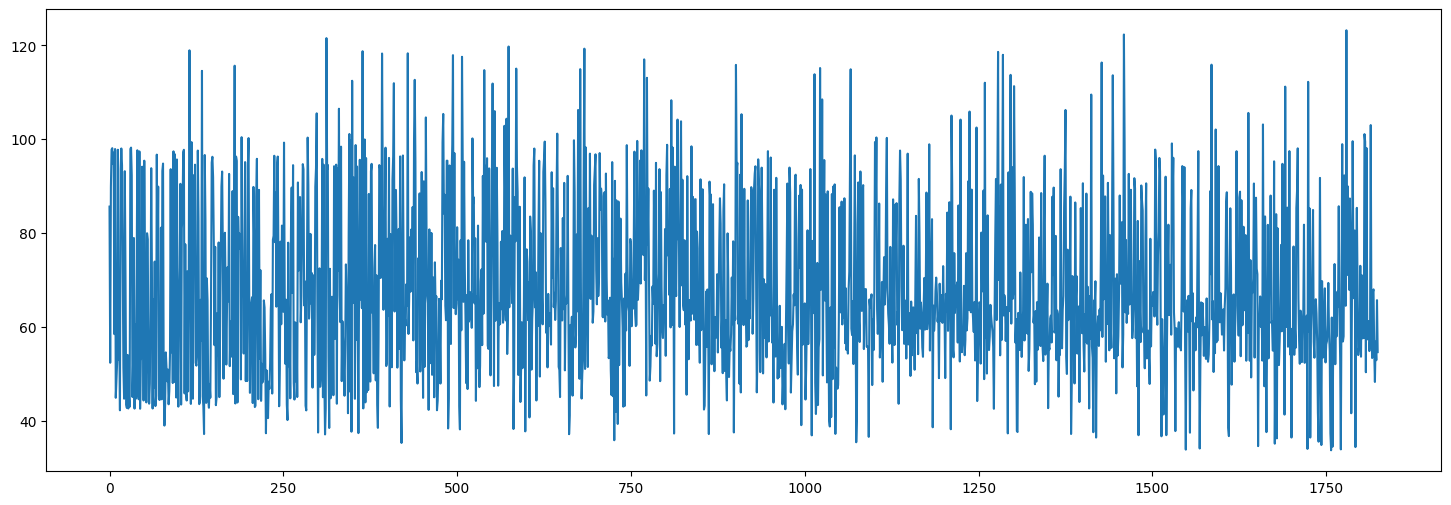

In [9]:
# Vamos ver a distribuição dos nossos dados ordenados.
plt.figure(figsize=(18, 6))
ts.Close.plot();

# Pergunta: Existe algo de errado na nossa série?

In [10]:
# Sim, existia! Vamos  arrumar nossa ordenação pela data de fechamento, e aproveitando vamos
# colocar nosso index como um "DatetimeIndex" (isso vai nos ajudar bastante na manipulação dos dados)
ts['dt'] = pd.to_datetime(ts['Date'])
ts = ts.set_index('dt')

ts.drop('Date', axis=1, inplace=True)

ts.columns = ['close']

In [11]:
ts.head()

,close
dt,
2018-11-23,85.629997
2013-12-24,52.360001
2019-12-24,89.849998
2017-12-28,97.790001
2017-12-27,98.089996


In [12]:
ts.sort_index(inplace=True)

In [13]:
ts.head()

,close
dt,
2013-01-02,35.119999
2013-01-03,34.830002
2013-01-04,34.389999
2013-01-07,34.459999
2013-01-08,33.709999


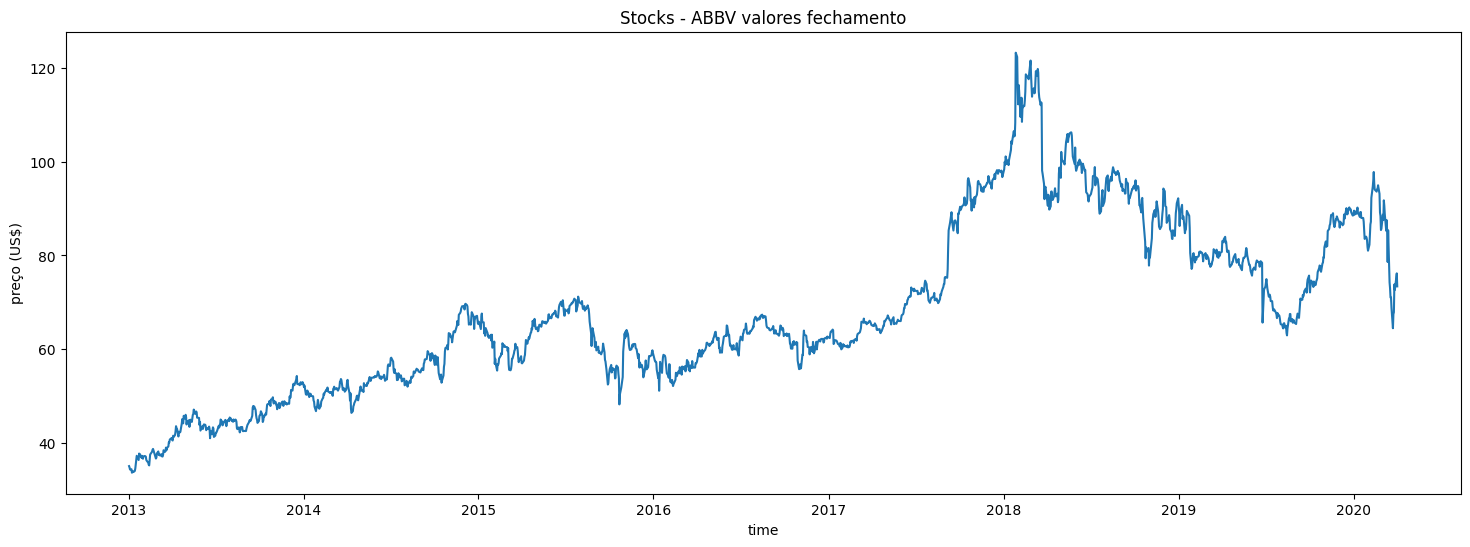

In [14]:
# Agora sim! Conseguimos começar a EDA da nossa série com mais segurança!

# Vamos ver sua distribuição real!
plt.figure(figsize=(18, 6))
plt.plot(ts)

plt.title('Stocks - ABBV valores fechamento')
plt.ylabel('preço (US$)')
plt.xlabel('time');

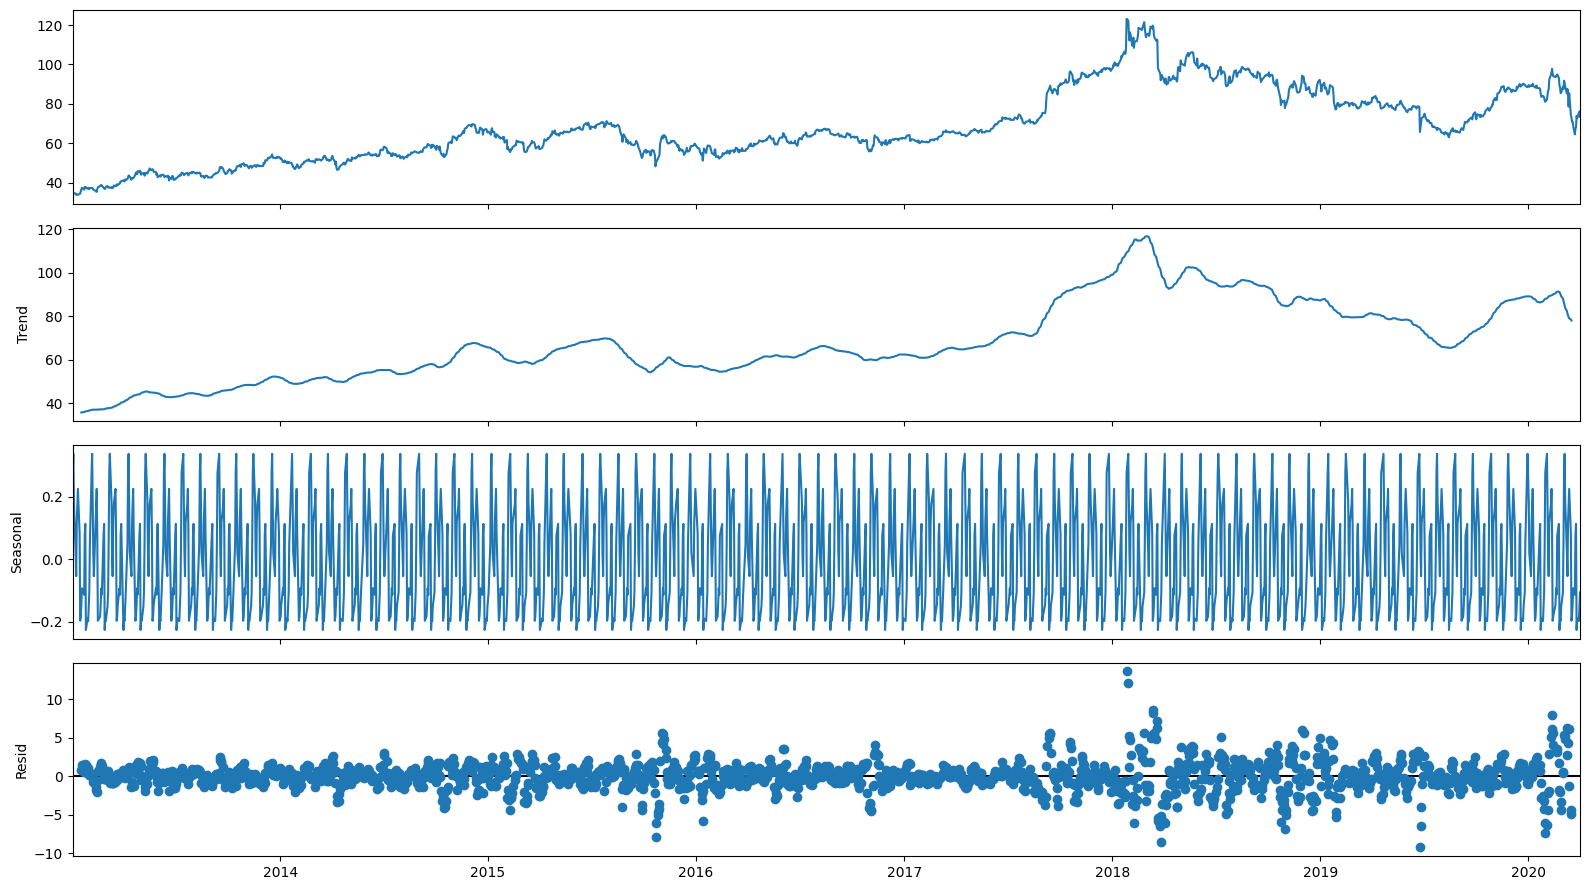

In [15]:
# Vamos realizar uma decomposição aditiva da nossa série, e estudar sua tendência, sazonalidade e resíduo.
#doc: https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
decomposition = seasonal_decompose(ts,
                                   model='additive',
                                   period=22)
#Opção de plot1
# decomposition.plot()

# #Opção de plot2
fig = decomposition.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# Decomposição Manual
* inspirado no medium: https://towardsdatascience.com/time-series-diy-seasonal-decomposition-f0b469afed44

In [19]:
# trend
seasonal_ts = ts.copy()
seasonal_ts["trend"] = seasonal_ts["close"].rolling(window=22, center=False).mean()

# # detrend
seasonal_ts["detrended"] = seasonal_ts["close"] - seasonal_ts["trend"]

# # seasonal component
seasonal_ts["day"] = seasonal_ts.index.day
seasonal_ts["seasonality"] = seasonal_ts.groupby("day")["detrended"].transform("mean")

# residues
seasonal_ts["resid"] = seasonal_ts["detrended"] - seasonal_ts["seasonality"]
#ou
seasonal_ts["resid"] = seasonal_ts["close"] - seasonal_ts["trend"] - seasonal_ts["seasonality"]

#explicação do Andre utilizando uma TS para cada componente
# seasonal_ts["close"] = seasonal_ts["resid"] + seasonal_ts["trend"] + seasonal_ts["seasonality"]


# results
seasonal_ts.head(30)

,close,trend,detrended,day,seasonality,resid
dt,,,,,,
2013-01-02,35.119999,NaN,NaN,2,-0.063413,NaN
2013-01-03,34.830002,NaN,NaN,3,0.105337,NaN
2013-01-04,34.389999,NaN,NaN,4,0.079992,NaN
2013-01-07,34.459999,NaN,NaN,7,-0.106002,NaN
2013-01-08,33.709999,NaN,NaN,8,0.008864,NaN
2013-01-09,33.900002,NaN,NaN,9,0.177129,NaN
2013-01-10,34.000000,NaN,NaN,10,0.335358,NaN
2013-01-11,33.849998,NaN,NaN,11,0.099184,NaN
2013-01-14,34.090000,NaN,NaN,14,0.214915,NaN


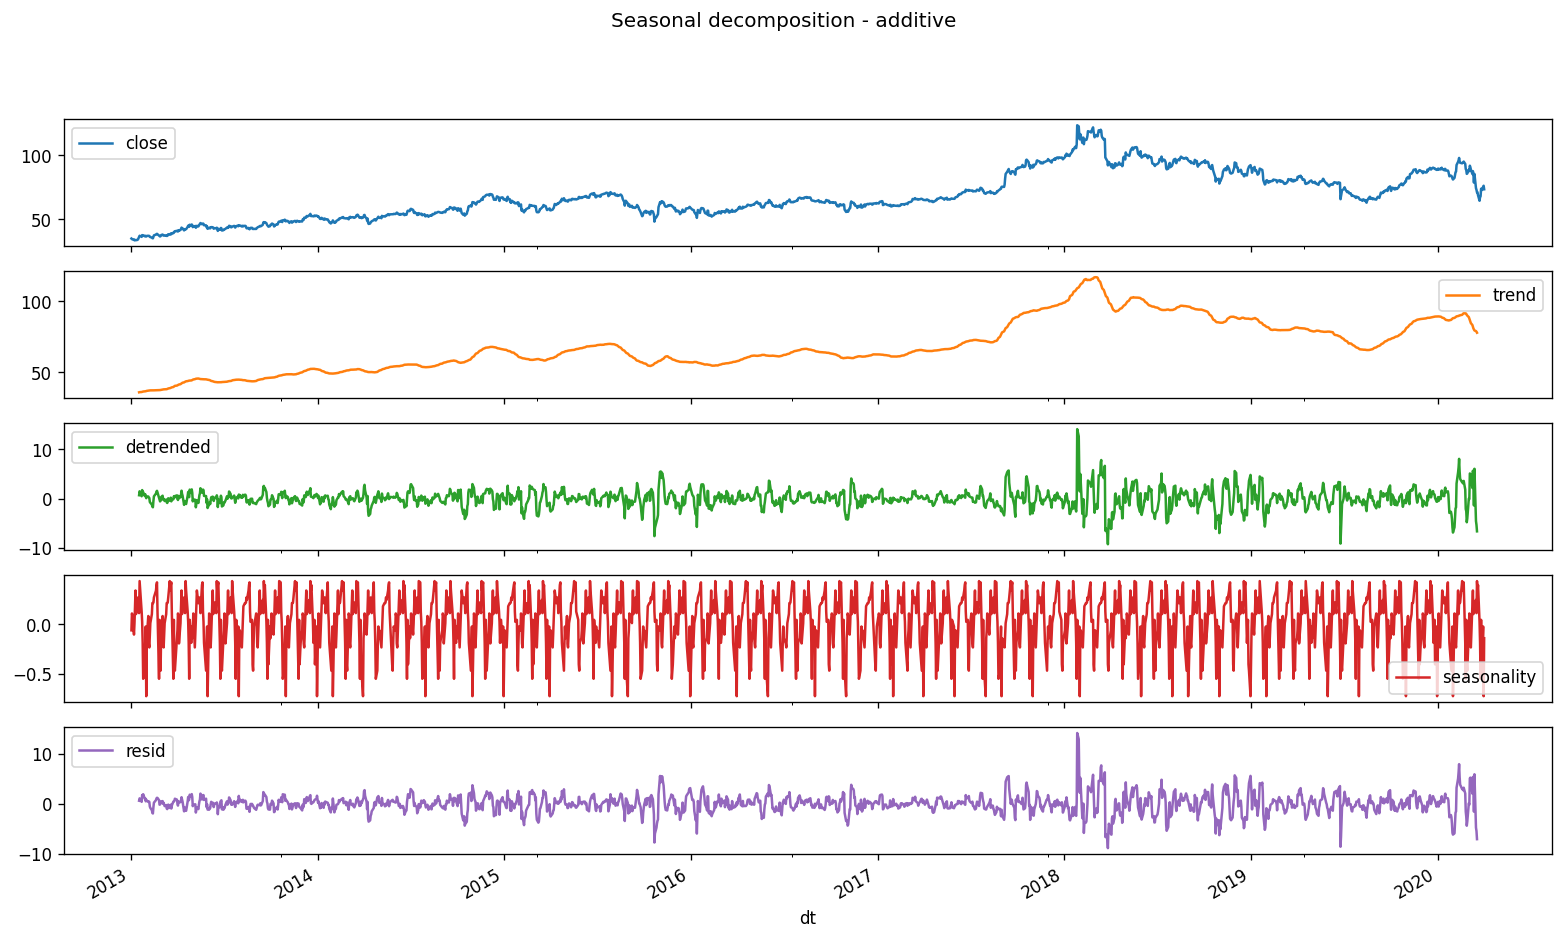

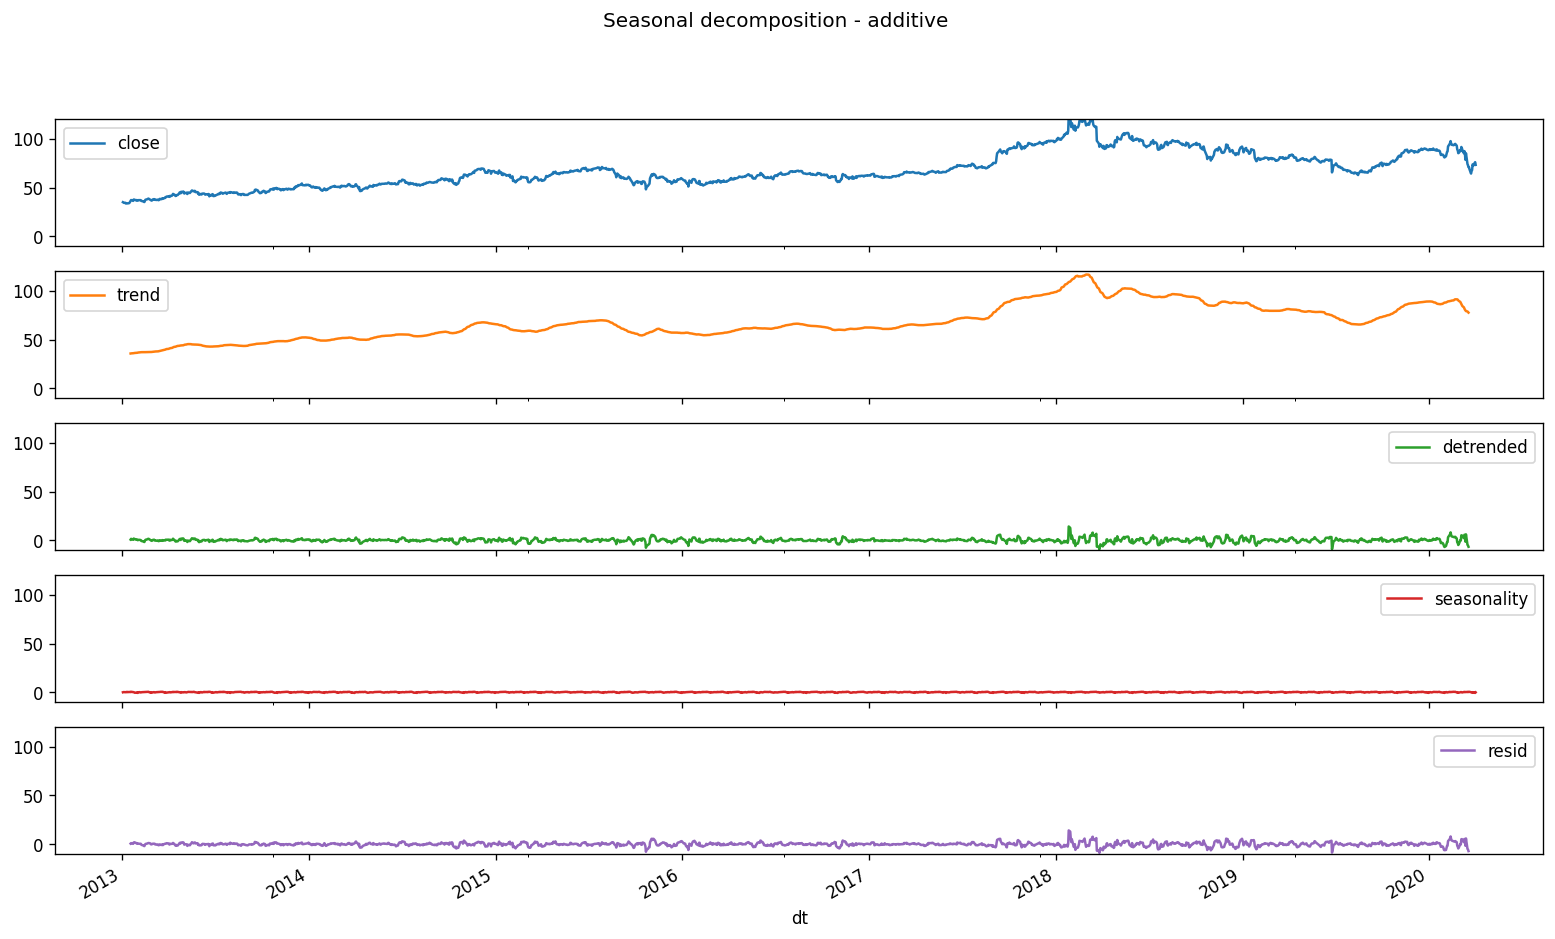

In [45]:
# seasonal_ts.loc[:, ["close", "trend", "detrended", "seasonality", "resid"]].plot(subplots=True, figsize = (16,9), title="Seasonal decomposition - additive");

# atribuindo a mesma escala em "y"
seasonal_ts.loc[:, ["close", "trend", "detrended", "seasonality", "resid"]].plot(subplots=True, figsize = (16,9), title="Seasonal decomposition - additive", ylim=[-10,120]); 

# Comparando os dois métodos

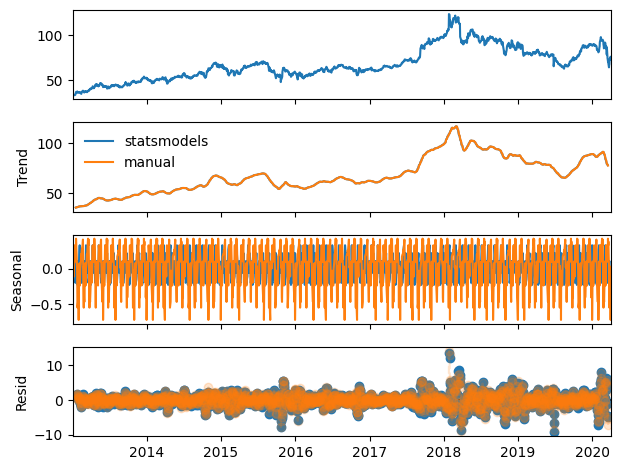

In [21]:
from statsmodels.tsa.seasonal import DecomposeResult

manual_decomposition = DecomposeResult(
    seasonal=seasonal_ts["seasonality"],
    trend=seasonal_ts["trend"],
    resid=seasonal_ts["resid"],
    observed=seasonal_ts["close"],
)

def add_second_decomp_plot(fig, res, legend):
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="dashed", alpha = .2)
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

fig = decomposition.plot()
add_second_decomp_plot(fig, manual_decomposition, ["statsmodels", "manual"]);

É claramente evidente que há uma tendência geral crescente nos dados, juntamente com algumas variações sazonais. No entanto, nem sempre é possível fazer tais inferências visuais. Então, mais formalmente, podemos verificar a estacionariedade usando o seguinte:

- **Plotando Rolando Estatísticas**: Podemos traçar a média móvel ou variância móvel e ver se varia com o tempo. Ao mover a média / variância, quero dizer que, em qualquer instante, 't', consideraremos a média / variância de um dado período, por exemplo o último mes, isto é, os últimos 30 dias. Mas, novamente, isso é mais uma técnica visual.


- **Teste Dickey-Fuller**: Este é um dos testes estatísticos para verificar a estacionariedade. Aqui a hipótese nula é que o TS é não-estacionário. Os resultados do teste compreendem uma estatística de teste e alguns  valores críticos para os níveis de confiança de diferença. Se a estatística de teste for menor que o valor crítico, podemos rejeitar a hipótese nula e dizer que a série é estacionária.

Esses conceitos podem não parecer muito intuitivos neste momento. Eu recomendo passar pelo artigo prequel. Se você estiver interessado em alguma estatística teórica, você pode consultar Introdução a Séries Temporais e Previsão  por Brockwell e Davis . O livro é um pouco pesado para as estatísticas, mas se você tiver a habilidade de ler as entrelinhas, poderá entender os conceitos e tangenciar as estatísticas tangencialmente.

De volta à verificação da estacionariedade, usaremos muito os gráficos estatísticos de rolagem juntamente com os resultados do teste Dickey-Fuller, de modo que defini uma função que recebe um TS como entrada e os gerou para nós.

In [25]:
# funções:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(22).mean()
    rolstd = timeseries.rolling(22).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean_22')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std_22')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # ADF Test
    result = adfuller(timeseries, autolag='AIC')

    print('Augmented Dickey Fuller test (ADH Test)')
    print('='*40)
    print(f'ADF Statistic: {result[0]:>24}')
    print('-'*40)
    print(f'p-value:       {result[1]:>24}')
    print('-'*40)
    print('Critial Values:')
    print('-'*40)
    for key, value in result[4].items():
        print(f'{key:>4} :{value:>33}')
    print('='*40)

### 4. Como fazer uma série temporal estacionária?

Embora a suposição de estacionariedade seja tomada em muitos modelos TS, quase nenhuma das séries temporais práticas é estacionária.

**Estacionariedade de uma série temporal é uma propriedade importante que descreve como seus valores estatísticos se comportam ao longo do tempo. Uma série temporal é considerada estacionária se suas propriedades estatísticas (como a média, a variância, a autocovariância) não mudam ao longo do tempo.**

Então, os estatísticos descobriram maneiras de tornar as séries estacionárias, o que discutiremos agora. Na verdade, é quase impossível fazer uma série perfeitamente estacionária, mas tentamos levá-la o mais perto possível. Vamos entender o que está tornando um TS não estacionário. Existem duas razões principais por trás da não estacionariedade de uma TS:

- 1. Tendência - variação média ao longo do tempo. Por exemplo, neste caso, vimos que, em média, o número de passageiros estava crescendo com o tempo.
- 2. Sazonalidade - variações em intervalos de tempo específicos. Por exemplo, as pessoas podem ter a tendência de comprar carros em um determinado mês devido ao aumento de salário ou festivais.


O princípio subjacente é modelar ou estimar a tendência e a sazonalidade da série e removê-la da série para obter uma série estacionária. Em seguida, as técnicas de previsão estatística podem ser implementadas nesta série. A etapa final seria converter os valores previstos na escala original aplicando as restrições de tendência e sazonalidade. Nota: discutiremos vários métodos. Alguns podem funcionar bem como neste caso e outros não. Mas a ideia é pegar o conceito de cada método e não focar apenas no problema em questão. Vamos começar trabalhando na parte da tendência.

### Estimando e eliminando tendências

Um dos primeiros truques para reduzir a tendência pode ser a transformação. Por exemplo, neste caso, podemos ver claramente que há uma tendência positiva significativa. Assim, podemos aplicar transformações que penalizam valores mais altos do que valores menores. Estes podem ser um log, raiz quadrada, raiz cúbica, etc. Vamos pegar uma transformação log aqui para simplificar:

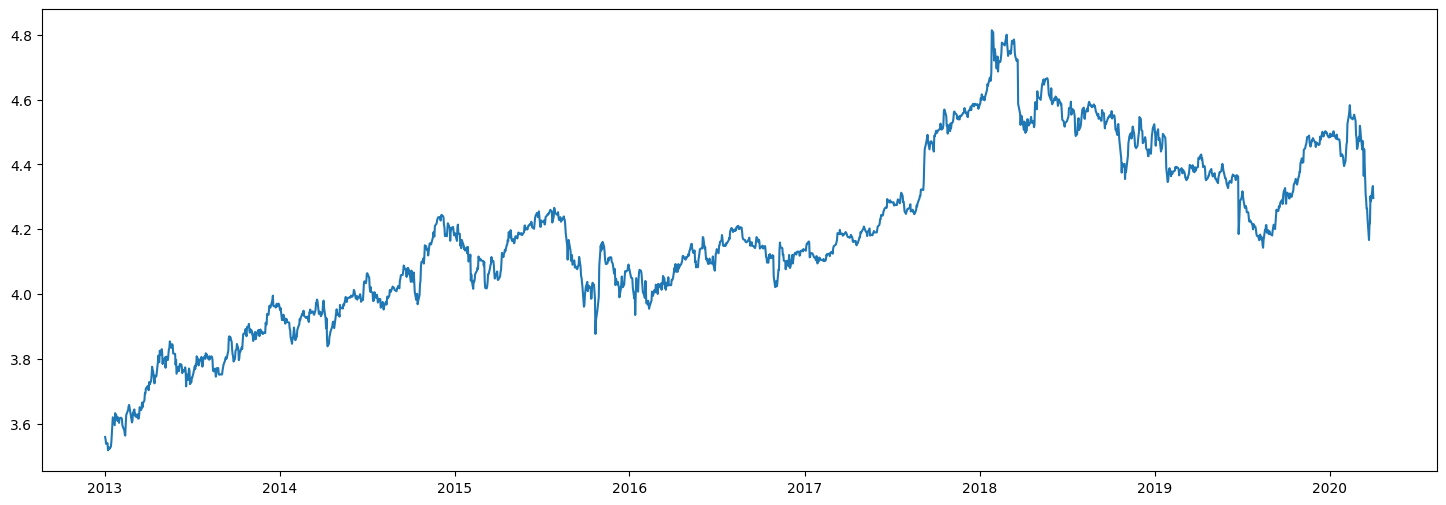

In [26]:
# Vamos tentar eliminar essa "Não estacionariedade" considerando o Log da nossa ts
plt.figure(figsize=(18, 6))
ts_log = np.log(ts)
plt.plot(ts_log);

# Deu certo?

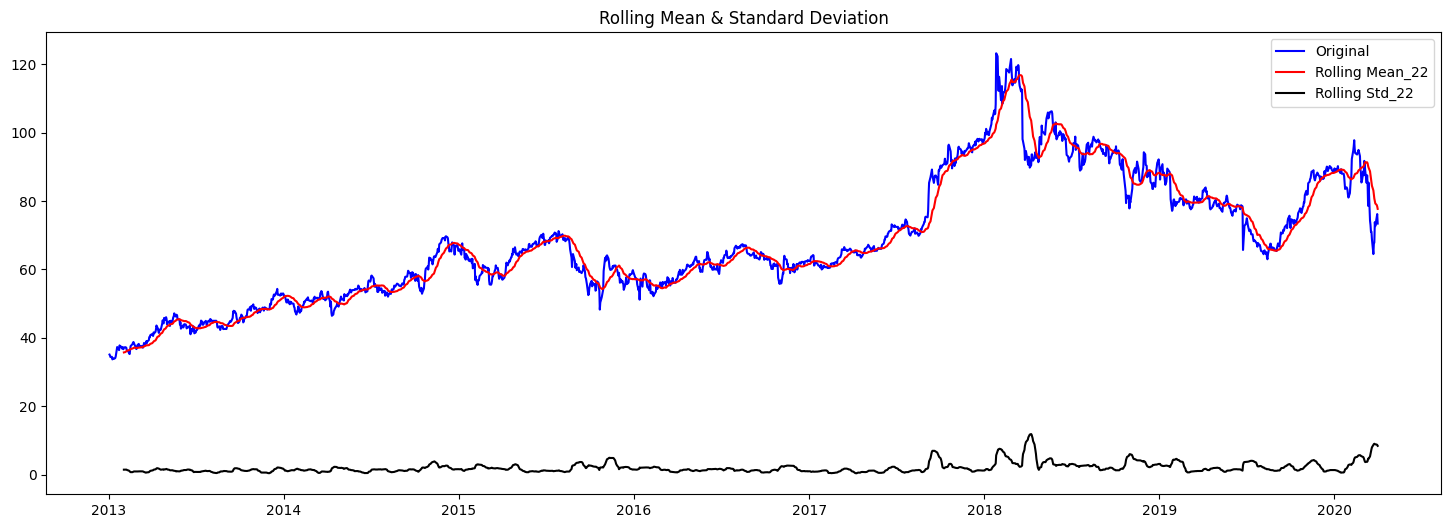

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:       -2.068202202530925
----------------------------------------
p-value:              0.257491328397224
----------------------------------------
Critial Values:
----------------------------------------
  1% :               -3.433972018026501
  5% :              -2.8631399192826676
 10% :              -2.5676217442756872


In [27]:
# Vamos testar!
#Sem log
plt.figure(figsize=(18, 6))
test_stationarity(ts)

# p_value >0.05 indica que a série não é estacionária

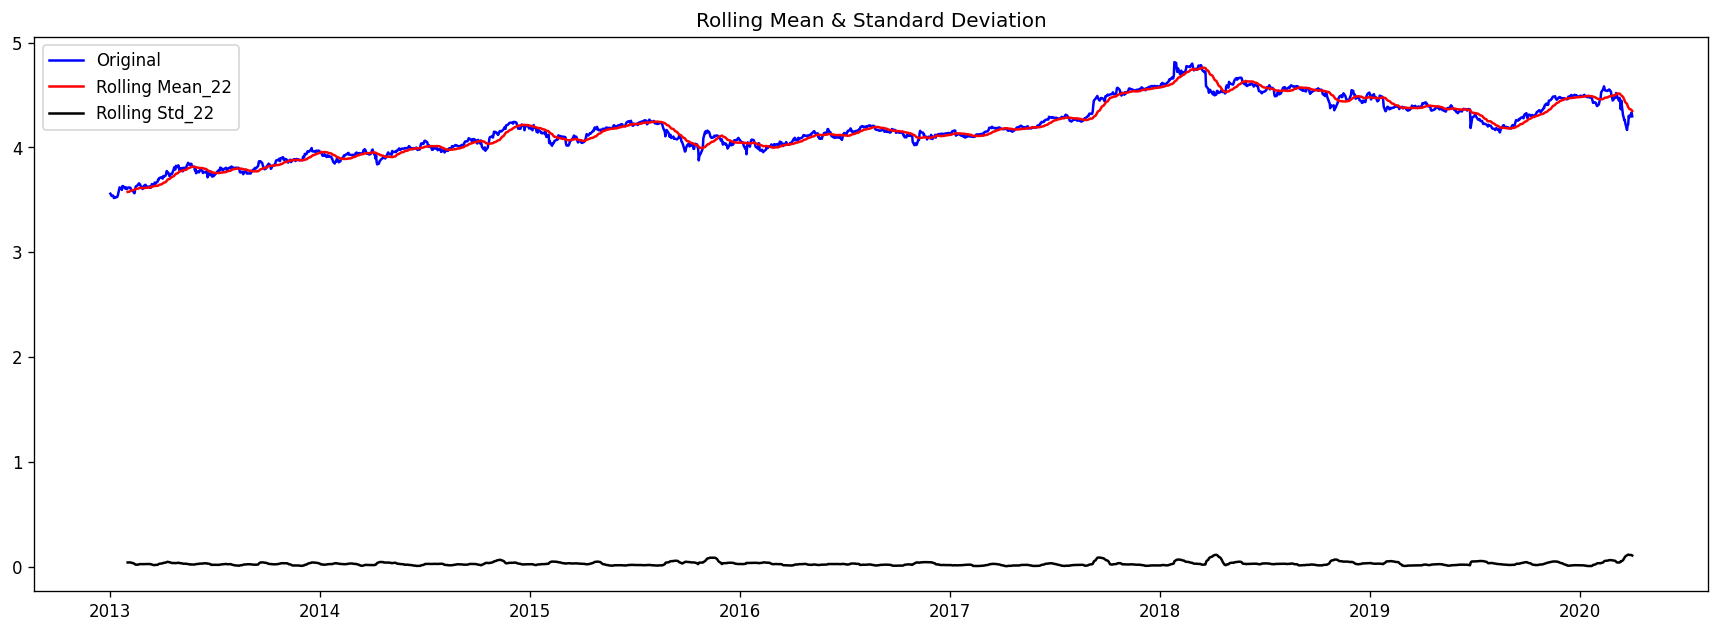

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:      -2.2419858001832593
----------------------------------------
p-value:            0.19136130225103531
----------------------------------------
Critial Values:
----------------------------------------
  1% :               -3.433972018026501
  5% :              -2.8631399192826676
 10% :              -2.5676217442756872


In [46]:
# Vamos testar!
#Com log
plt.figure(figsize=(18, 6))
test_stationarity(ts_log)

# p_value >0.05 indica que a série não é estacionária

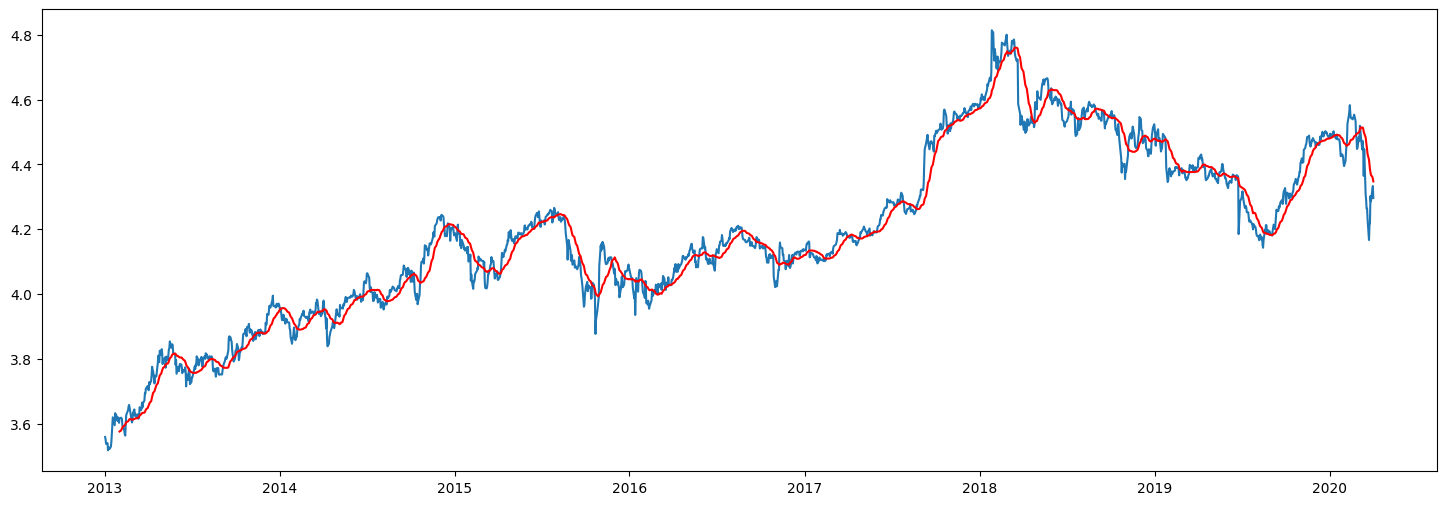

In [29]:
# Vamos analisar a MA dessa série:
plt.figure(figsize=(18, 6))
moving_avg_22 = ts_log.rolling(22, center = False).mean()
plt.plot(ts_log)
plt.plot(moving_avg_22, color='red');

,close
dt,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
2013-01-08,NaN
2013-01-09,NaN
2013-01-10,NaN
2013-01-11,NaN
2013-01-14,NaN


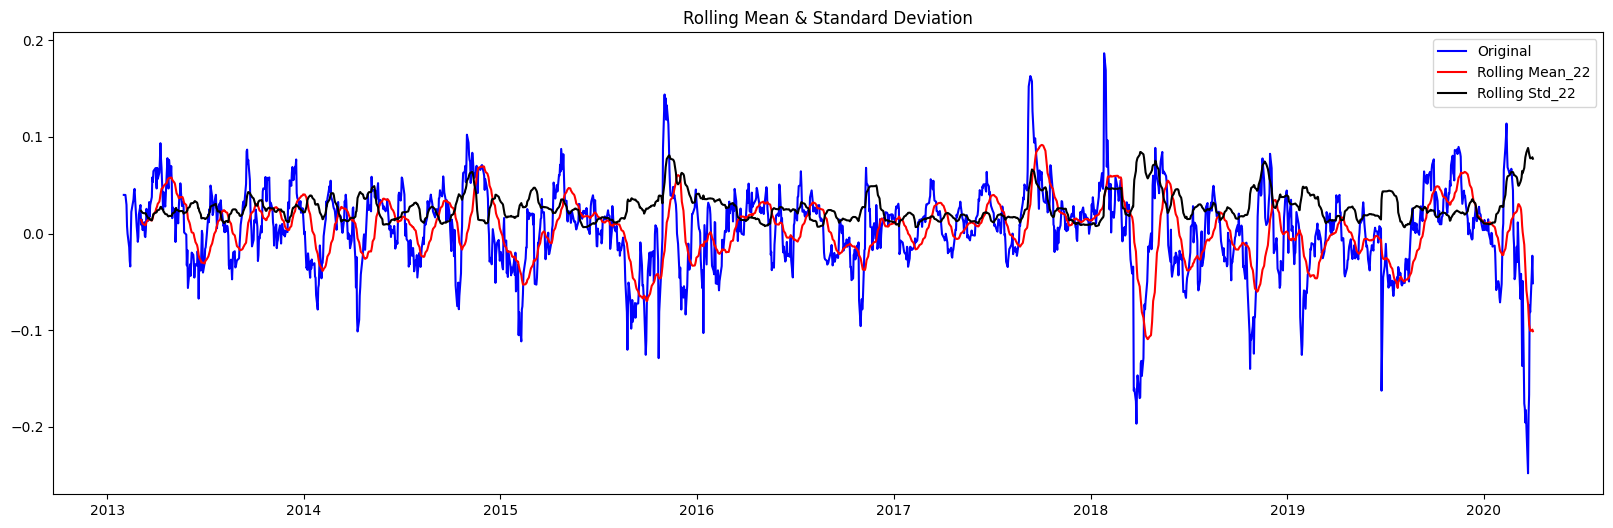

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:       -8.492433951579136
----------------------------------------
p-value:         1.3025185891390943e-13
----------------------------------------
Critial Values:
----------------------------------------
  1% :              -3.4340146436883665
  5% :              -2.8631587363584567
 10% :              -2.5676317637986714


In [30]:
# Removendo agora o efeito de têndencia e "variação" da variância
ts_log_moving_avg_diff = ts_log - moving_avg_22
display(ts_log_moving_avg_diff.head(25))

#plot removendo a componente tendencia
plt.figure(figsize=(20, 6))
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# p_value < 0.05 indica que agora a série é estacionária

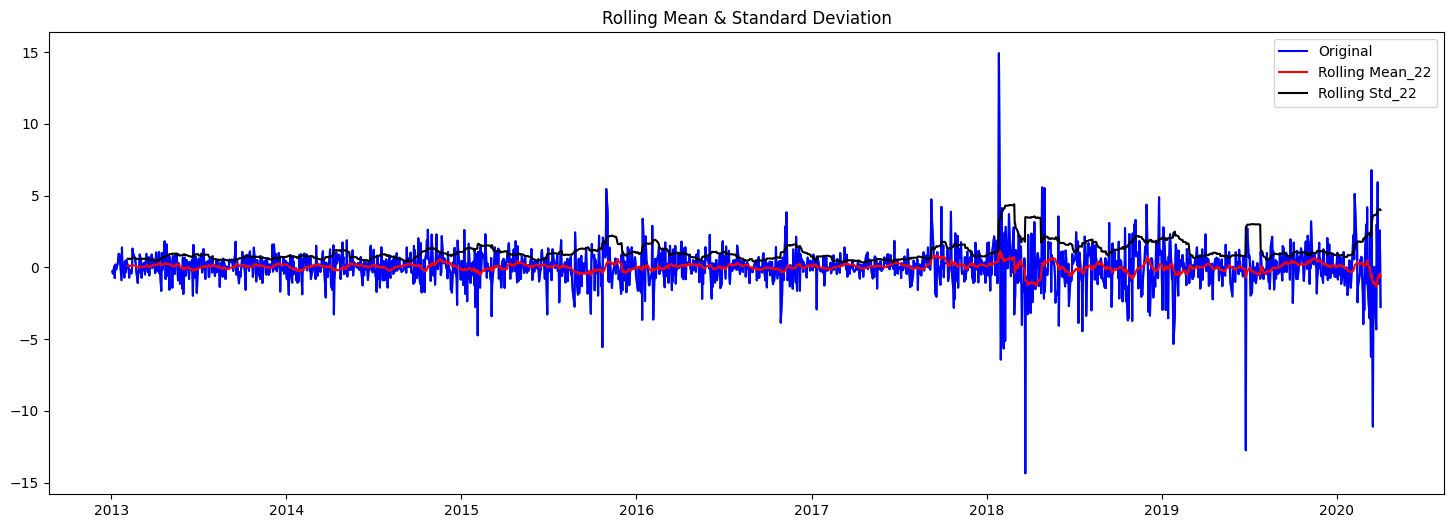

Augmented Dickey Fuller test (ADH Test)
ADF Statistic:       -9.865671125326017
----------------------------------------
p-value:          4.120452820857101e-17
----------------------------------------
Critial Values:
----------------------------------------
  1% :               -3.433972018026501
  5% :              -2.8631399192826676
 10% :              -2.5676217442756872


In [31]:
# Outra maneira é fazer a diferenciação dessa série, ou seja, seu valor atual menos o valor anterior (ordem 1):
plt.figure(figsize=(18, 6))
ts_sft = ts - ts.shift()
plt.plot(ts_sft)
test_stationarity(ts_sft.dropna())

# p_value < 0.05 indica que agora a série é estacionária

### Forecasting

In [32]:
ts.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='dt', length=1825, freq=None)

,modelo,MSE
0,Mean,322.1


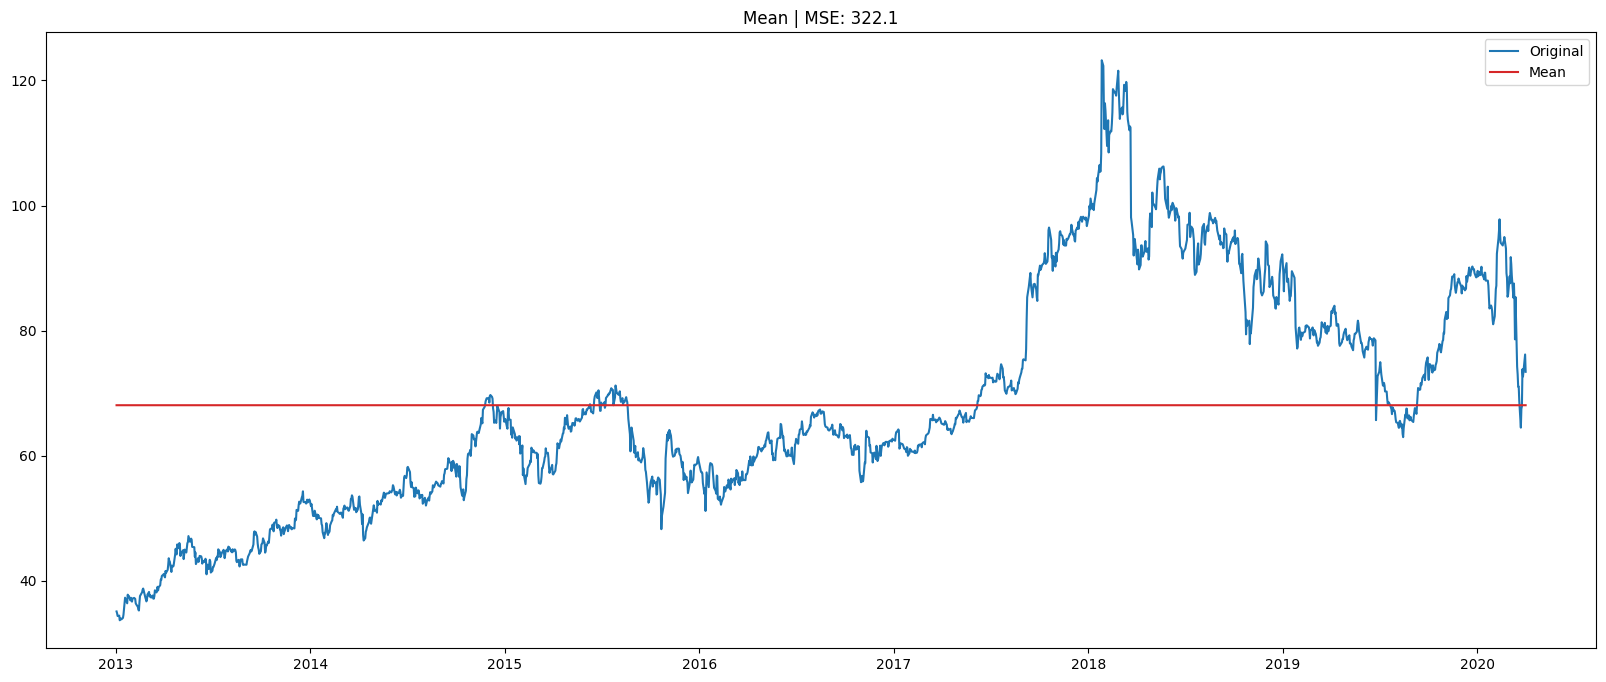

In [34]:
# Vamos começar a estudar algumas primeiras estimativas para nossa série:
df_validacao = pd.DataFrame(columns = (['modelo', 'MSE']))

# Modelo 1 - Baseline (Dummy)
# Será q a média consegue descrever bem nossa distribuição?
plt.figure(figsize=(20, 8))
plt.plot(ts, color='C0',label='Original')
yhat = [ts.close.mean() for _ in ts.index]
MSE_mean = np.round(mean_squared_error(ts.close.values, yhat),2)

plt.title(f'Mean | MSE: {MSE_mean}')
plt.plot(ts.index, yhat, label=f'Mean', c='C03');
plt.legend();

df_validacao = df_validacao.append({'modelo': 'Mean', 'MSE': MSE_mean}, ignore_index=True)
df_validacao

,modelo,MSE
0,Mean,322.10
1,LR,113.42


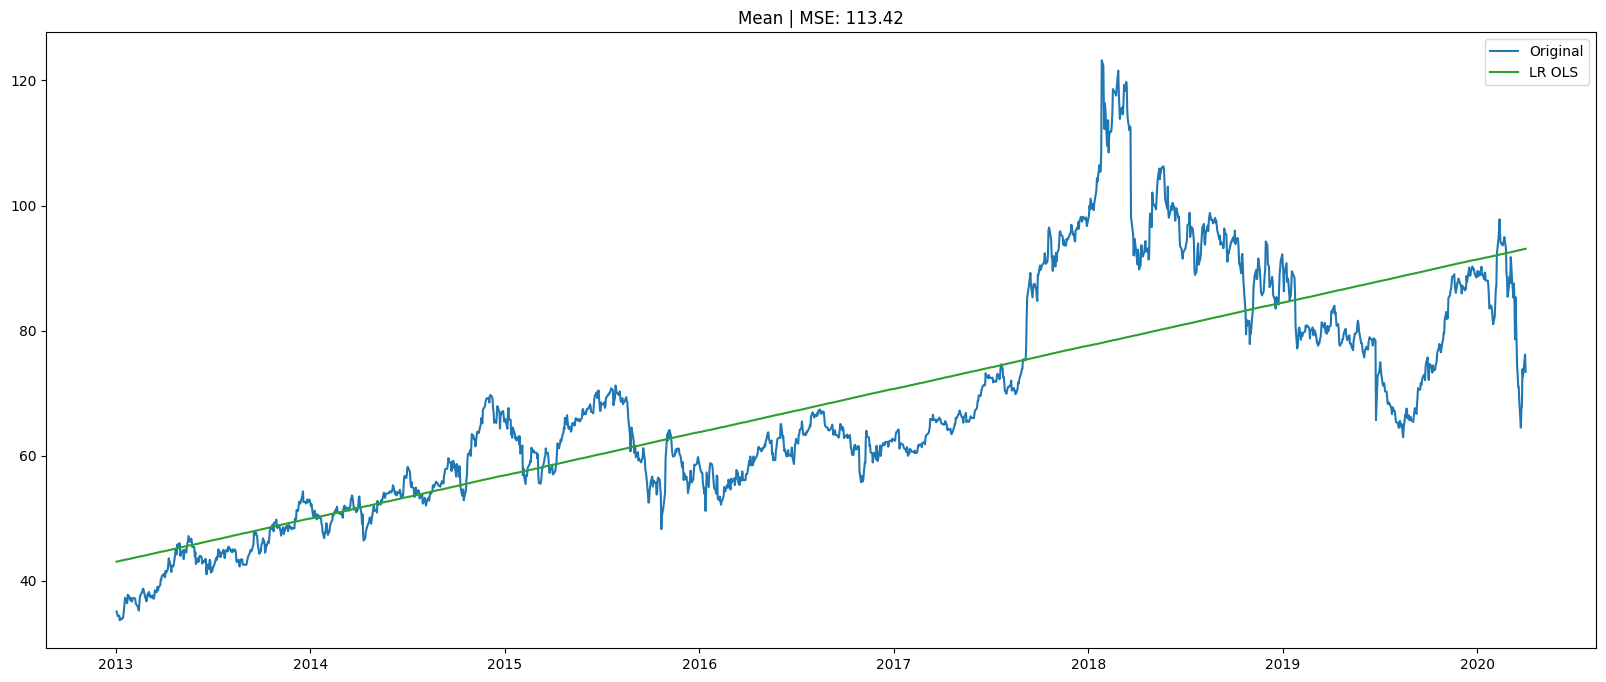

In [35]:
# Modelo 2 - Linear Regression
from sklearn.linear_model import LinearRegression

ts['order'] = range(ts.shape[0])
reg = LinearRegression().fit(ts[['order']], ts.close)
yhat = reg.predict(ts[['order']])
MSE_lr = np.round(mean_squared_error(ts.close.values, yhat),2)

plt.figure(figsize=(20, 8))
plt.title(f'Mean | MSE: {MSE_lr}')
plt.plot(ts.close, color='C0',label='Original')
plt.plot(ts.index, yhat, label=f'LR OLS', c='C02')
plt.legend();

df_validacao = df_validacao.append({'modelo': 'LR', 'MSE': MSE_lr}, ignore_index=True)
# df_validacao = df_validacao.sort_values('MSE', ascending = True)
display(df_validacao)

#dropando a col 'order'
ts.drop('order', axis = 1, inplace = True)

# Funcionou?
# MSE diminuiu significativamente conforme esperado

# Exponential Smoothing
Exponential Smoothing is a time series forecasting method for univariate data that can be extended to support data with a systematic trend or seasonal component.
It is a powerful forecasting method that may be used as an alternative to the popular Box-Jenkins ARIMA family of methods.

https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

,modelo,MSE
0,Mean,322.10
1,LR,113.42
2,e_Smoothing 0.99,1.82
3,e_Smoothing 0.1,8.70
4,e_Smoothing 0.05,15.47
5,e_Smoothing 0.005,111.07
6,e_Smoothing 0.0005,754.79
7,e_Smoothing 0,1408.51


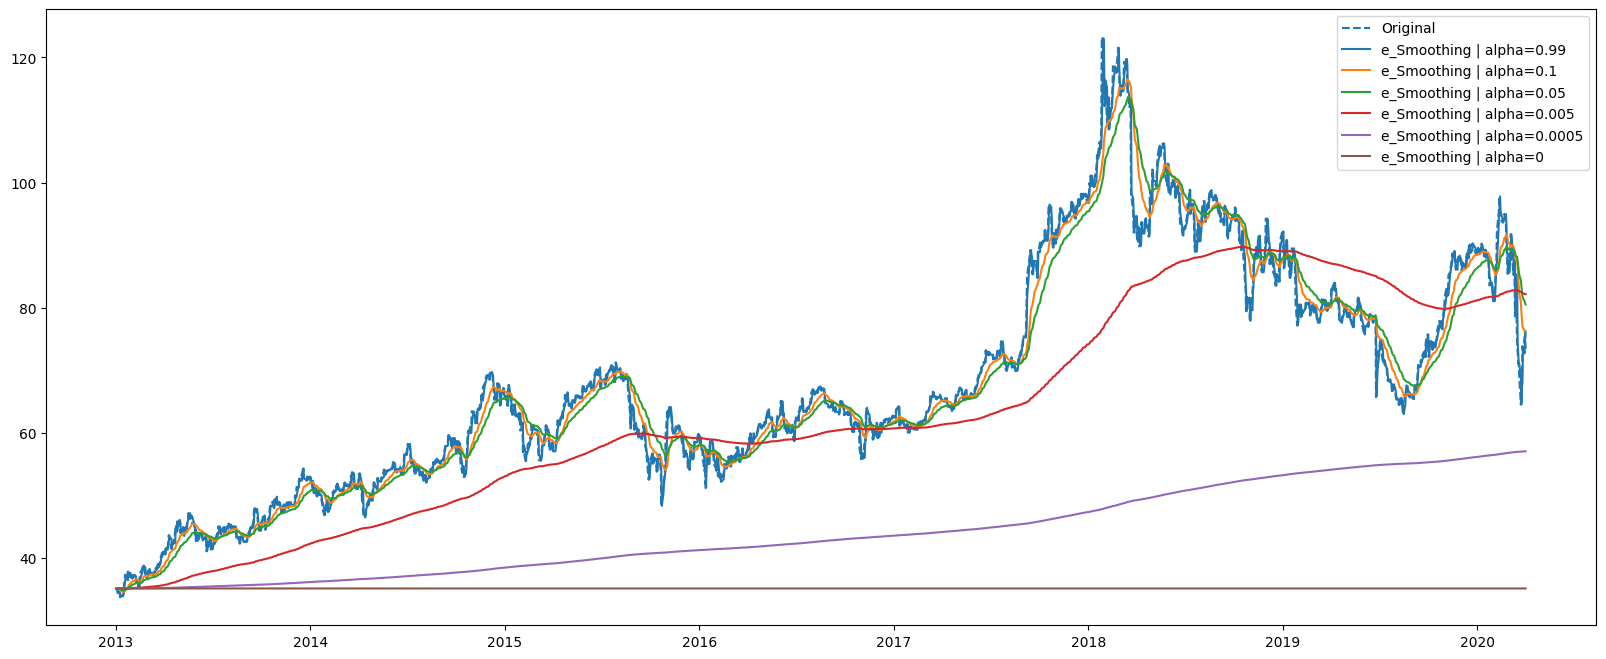

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Modelo 3 - Exponential Smoothing
model = SimpleExpSmoothing(ts)

plt.figure(figsize=(20, 8))
plt.plot(ts.close, color='C0',label='Original', linestyle = '--' )

for alpha in [.99, .1, .05, .005, .0005, 0]:

    # fit model
    model_fit = model.fit(alpha)
    # make prediction
    yhat = model_fit.predict(ts.index.min(), ts.index.max())
    MSE_es = np.round(mean_squared_error(ts.close.values, yhat),2)
    df_validacao = df_validacao.append({'modelo': f'e_Smoothing {alpha}', 'MSE': MSE_es}, ignore_index=True)
    plt.plot(ts.index, yhat, label=f'e_Smoothing | alpha={alpha}')

plt.legend();
# df_validacao = df_validacao.sort_values('MSE', ascending = True)
display(df_validacao)

* As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações envelhecem.

* Quanto maior o valor de alpha, maior a importância dada às observações mais recentes, o que torna o modelo mais sensível a variações recentes nos dados.

* Quanto menor o valor de alpha, mais suavizada será a previsão, dando mais importância às observações passadas.

# ARIMA

Deixe-me dar uma breve introdução ao ARIMA . Não vou entrar nos detalhes técnicos, mas você deve entender esses conceitos detalhadamente se quiser aplicá-los com mais eficiência. ARIMA significa Médias Móveis Integradas Auto-Regressivas . A previsão ARIMA para uma série temporal estacionária nada mais é que uma equação linear (como uma regressão linear). Os preditores dependem dos parâmetros (p, d, q) do modelo ARIMA:

- $p$: ordem do modelo AR
- $q$: ordem do modelo MA
- $d$: número de diferenciações necessárias para que a série seja estacionária

- **AR (p)** - modelo de autorregressão, isto é, regressão da série temporal em si. Premissa básica - os valores da série atual dependem de seus valores anteriores com algum atraso (ou várias defasagens - lags ou shifts). O atraso máximo no modelo é referido como p. Para determinar o p inicial. (em econometria analisamos um grafico chamado PACF para anlisar o p, em machine learning faremos via grid search).

- **MA (q)** - modelo de média móvel. Sem entrar em detalhes, modela o erro da série temporal, novamente a suposição é - o erro atual depende do anterior com algum atraso, que é referido como q. (em econometria usamos o grafico ACF).

Vamos fazer uma pequena pausa e combinar as primeiras 4 letras:

**AR(p) + MA(q) = ARMA(p,q)**

O que temos aqui é o modelo de médio movimento autorregressivo! Se a série é estacionária, pode ser aproximada com essas 4 letras. Devemos continuar?

- **I(d)**— ordem de integração. É simplesmente o número de diferenças não sazonais necessárias para tornar a série estacionária. Como a ideia de estacionariedade é razoavelmente complicada para essa introdução, vamos defini-la apenas como uma curva "bem comportada", que em séries temporais seria algo não explosivo, com variância constante e sazonalidade constante.

**AR(p) + I(d) + MA(q) = ARIMA(p,d,q)**

Há outros filtros como o S de sazonal e outras formas funcionais como o VAC e o VEC e até modelos que preevem volatidade (muito usado no mercado financeiro) como os GARCH. Aqui ficaremos no mais simples.


Uma preocupação importante aqui é como determinar o valor de 'p' e 'q'. Nós usamos dois gráficos para determinar esses números. Vamos discuti-los primeiro.

**Função de Autocorrelação (ACF)**: É uma medida da correlação entre o TS com uma versão defasada de si mesmo. Por exemplo, no intervalo 5, o ACF compararia as séries no instante de tempo 't1' ... 't2' com as séries no instante 't1-5'… 't2-5' (t1-5 e t2 sendo pontos finais).


**Função de Autocorrelação Parcial (PACF)**: Mede a correlação entre a TS com uma versão defasada de si mesma, mas depois elimina as variações já explicadas pelas comparações intervenientes. Por exemplo, no lag 5, ele verificará a correlação, mas removerá os efeitos já explicados pelos lags 1 a 4.

**ChatGPT:**
* **ACF** (Autocorrelation Function):
O ACF mede a correlação entre uma série temporal e seus próprios valores defasados (lags) em intervalos de tempo sucessivos. Ele avalia como cada valor na série está relacionado a valores anteriores em diferentes intervalos de tempo. O ACF pode ajudar a identificar padrões sazonais ou periódicos na série temporal, bem como indicar o número de lags relevantes a serem incluídos em um modelo de séries temporais.

* **PACF** (Partial Autocorrelation Function):
O PACF, por outro lado, mede a correlação entre um valor em uma série temporal e um valor defasado específico, enquanto controla (ou "parcializa") os efeitos dos lags intermediários. Em outras palavras, o PACF mostra a correlação direta entre os valores em dois pontos no tempo, excluindo a influência de valores em intervalos intermediários. O PACF é frequentemente usado para determinar a ordem apropriada de um modelo autorregressivo (AR), ajudando a identificar quais lags são estatisticamente significantes.

* How to interpret ACF, PACF medium post:

https://medium.com/@ooemma83/how-to-interpret-acf-and-pacf-plots-for-identifying-ar-ma-arma-or-arima-models-498717e815b6

* **AIC** (Critério de Informação de Akaike): O AIC é uma métrica que leva em consideração a qualidade de ajuste do modelo e a complexidade do modelo. Ele penaliza modelos mais complexos, incentivando a escolha de modelos mais simples que ainda descrevam bem os dados. No contexto de modelos ARIMA, o objetivo é encontrar o modelo com o menor valor de AIC.

* **BIC** (Critério de Informação Bayesiano): O BIC é semelhante ao AIC, mas impõe uma penalidade mais forte para modelos mais complexos. Portanto, o BIC tende a selecionar modelos ainda mais simples do que o AIC. O BIC é particularmente útil quando se deseja evitar o ajuste excessivo, pois penaliza mais fortemente a inclusão de variáveis desnecessárias.

## Primeiro verificamos a estacionariedade da série
* já realizamos esta verificação anteriormente neste mesmo notebook, mas vamos repetir o teste Dickey Fuller

* análise inspirada no tutorial: https://www.youtube.com/watch?v=xbqY485yslI

# Valor de $d$
* para encontrar o valor de $d$ ideal utilizaremos o gráfico ACF e o teste de estacionariedade Augmented Dickey–Fuller

## Teste de estacionariedade | Augmented Dickey–Fuller

In [37]:
#série original
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# p-valor > 0.05, logo a série não é estacionária
# necessário realizar 1 ou 2 diferenciações para tornar a série estacionária

ADF Statistic: -2.068202202530925
p-value: 0.257491328397224


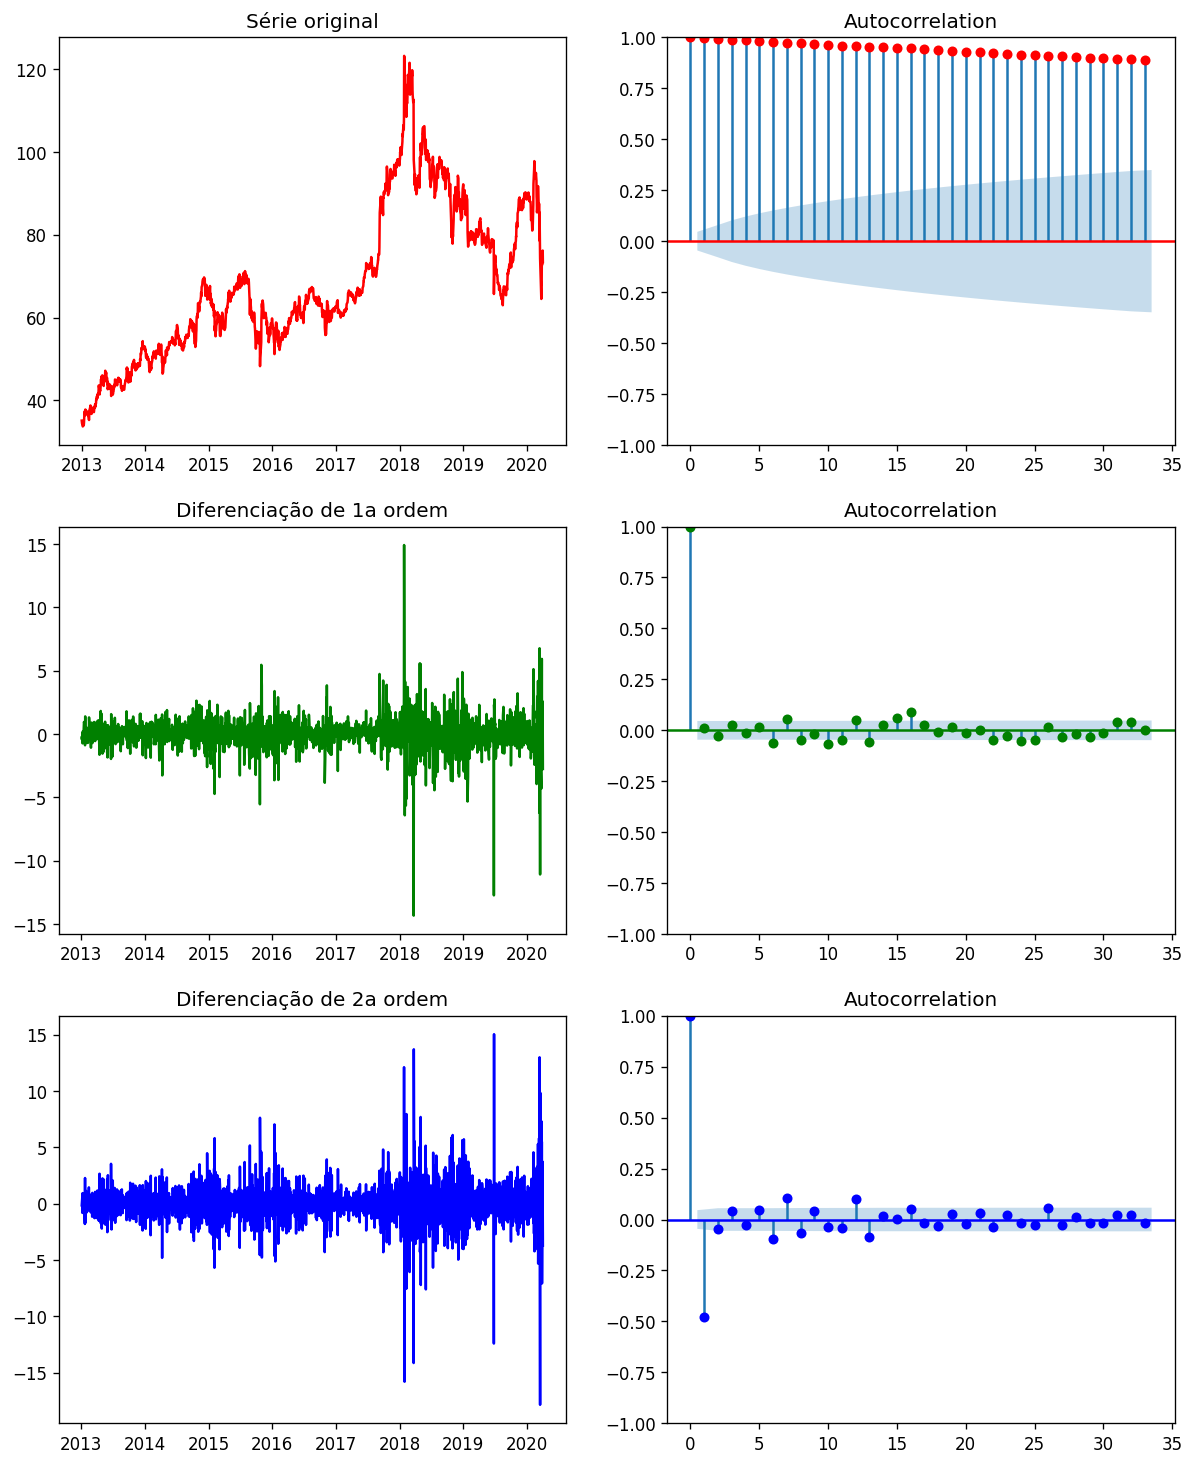

In [38]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})

#série original
fig, axes = plt.subplots(3,2, sharex = False)
axes[0,0].plot(ts, color = 'r');
axes[0,0].set_title('Série original');
plot_acf(ts, ax = axes[0,1], color = 'r')

#primeira diferenciação
axes[1,0].plot(ts.diff(), color = 'g');
axes[1,0].set_title('Diferenciação de 1a ordem');
plot_acf(ts.diff().dropna(), ax = axes[1,1], color = 'g')

#primeira diferenciação
axes[2,0].plot(ts.diff().diff(), color = 'b');
axes[2,0].set_title('Diferenciação de 2a ordem');
plot_acf(ts.diff().diff().dropna(), ax = axes[2,1], color = 'b')

plt.show()

* No gráfico de Autocorrelação para ordem 1 verifica-se que nenhum lag ultrapassou o limite de significancia, já para ordem 2 verifica-se que o lag 1 ultrapassou o limite de significancia negativo, indicando que houve uma sobre diferenciação. Por este motivo seguiremos com a diferenciação de ordem 1.

In [39]:
#Teste de estacionariedade | Diferenciação de 1a. ordem

result = adfuller(ts.diff().dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -9.865671125326017
p-value: 4.120452820857101e-17


* p-valor < 0.05, logo a série é estacionária para diferenciação de 1a ordem.
* Logo consideraremos **$d$ = 1**

# Valor de  $p$ (AR)
* Para encontrar o valor de $p$ ideal utilizaremos o gráfico PACF
* Qualquer autocorrelação em uma série estacionária pode ser corrigida agregando o número suficiente de ordens para AR.

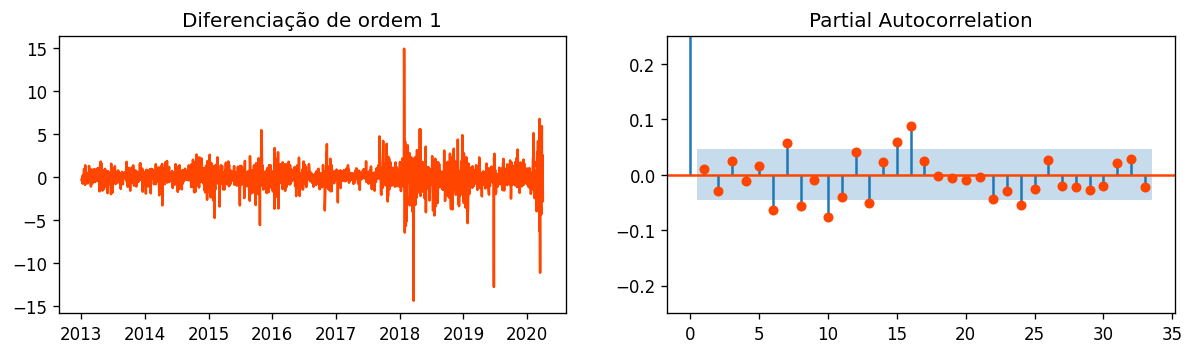

In [40]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

#PACF plot - diferenciação ordem 1
fig, axes = plt.subplots(1,2, sharex = False)
axes[0].plot(ts.diff(), color = 'orangered');
axes[0].set_title('Diferenciação de ordem 1');
plot_pacf(ts.diff().dropna(), ax = axes[1], color = 'orangered')
axes[1].set(ylim=(-.25,.25))
plt.show()

* Verifica-se no gráfico PACF que o lag 6, 7 e 8 são os primeiros que ultrapassaram o limite de confiança (em azul), logo podemos testa-los para $p$ e verificar qual apresenta melhores resultados).
* Para efeitos didáticos consideraremos o termo **$p$ = 6**

# Valor de  $q$ (MA)
* para encontrar o valor de $q$ ideal utilizaremos o gráfico ACF
* o gráfico ACF indica quantos termos MA são requeridos para eliminar qualquer autocorrelação na série estacionarizada

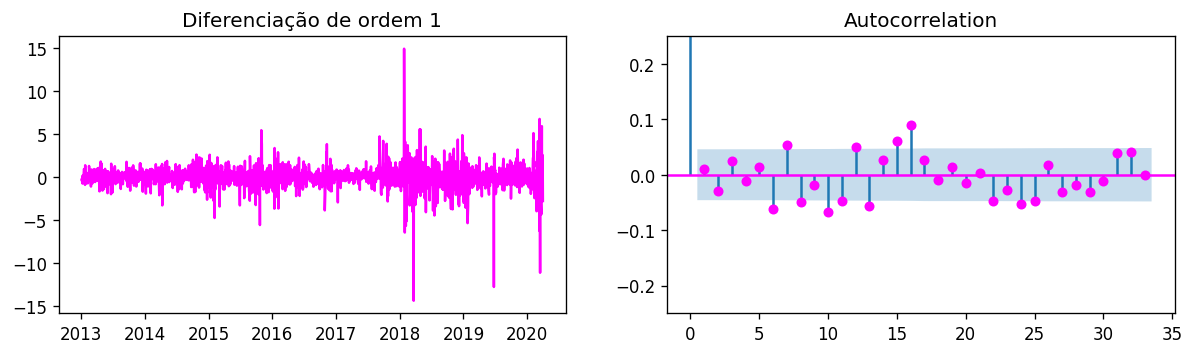

In [41]:
#ACF plot
fig, axes = plt.subplots(1,2, sharex = False)
axes[0].plot(ts.diff(), color = 'fuchsia');
axes[0].set_title('Diferenciação de ordem 1');
plot_acf(ts.diff().dropna(), ax = axes[1], color = 'fuchsia')
axes[1].set(ylim=(-.25,.25))
plt.show()

* Verifica-se no gráfico ACF que os lags 6, 7 e 8 novamente são os primeiros que ultrapassaram o limite de confiança (em azul), logo podemos testa-los para $p$ e verificar qual apresenta melhores resultados).
* Para efeitos didáticos consideraremos o termo **$q$ = 6**

# Temos então: $p$, $d$, $q$ = (6,1,6)

# ARIMA 6,1,6 | Treino_270 | Horizon_22
* Janela de treinamento = 1 ano (270 dias uteis) | Horizonte de previsao = 1 mês (22 dias uteis)

In [42]:
tscv = TimeSeriesSplit(n_splits = 5, max_train_size = 270, test_size = 22)
#janela de treinamento = 270 (equivale a aprox 1 ano dias uteis)
#horizonte de treinamento (22 dias uteis, aprox 1 mes)

cv = 0
mse = []
aic = []
bic = []
X = ts.diff().dropna()
for train_index, test_index in tscv.split(X):
    cv_train, cv_test = X.iloc[train_index], X.iloc[test_index]
    print('train', cv_train.index.min().strftime('%Y%m%d'), cv_train.index.max().strftime('%Y%m%d'))
    print('test',cv_test.index.min().strftime('%Y%m%d'), cv_test.index.max().strftime('%Y%m%d'))
    print('')

    model_616 = sm.tsa.arima.ARIMA(cv_train, order=(6,1,6)).fit()
    forecast_616 = model_616.forecast(len(cv_test))

    df_forecast_616 = cv_test.copy()
    df_forecast_616.rename(columns = {'close':'diff_close'}, inplace = True)
    df_forecast_616['diff_forecast_616'] = forecast_616.values
    df_forecast_616 = df_forecast_616.join(ts, how = 'left')

    list_pred = []
    for i, (c, d) in enumerate(zip(df_forecast_616['close'], df_forecast_616['diff_forecast_616'])):
        if i == 0:
            pred = np.nan
        elif i == 1:
            pred = df_forecast_616['diff_forecast_616'][i] + df_forecast_616['close'][i-1]
        else:
            pred = df_forecast_616['diff_forecast_616'][i] + pred

        list_pred.append(pred)
            #soma a previsão de diff ao ultimo
            # para a primeira previsão (horizonte = 1) considera-se o último "Close" real + a diff prevista,
            # #porém para as predições subsequentes vamos incrementando a diff prevista à ultima predição,
            # #aumentando assim a imprecisão do modelo conforme se distancia do ultimo valor real (efeito boca de jacaré)
    df_forecast_616['forecast_616'] = list_pred
    df_forecast_616 = df_forecast_616[['close','diff_close', 'diff_forecast_616', 'forecast_616' ]]
    if cv == 0:
        display(df_forecast_616)

    #cv_train com escala real do "close"
    df_close_train = ts.loc[cv_train.index.min():cv_train.index.max()]

    #mse
    df_rmse = df_forecast_616.dropna().copy()
    true_values = df_rmse['close'].values
    pred_values = df_rmse['forecast_616'].values
    mse_cv = np.round(mean_squared_error(true_values, pred_values),6)
    mse.append(mse_cv)
    print('MSE: ', mse_cv)

    #aic, bic
    # Get the log-likelihood of the model
    log_likelihood = model_616.llf

    # Get the number of estimated parameters
    num_params = len(model_616.params)

    # Calculate AIC and BIC
    nobs = len(cv_train) #nobs: n observations
    aic_ = int(-2 * log_likelihood + 2 * num_params)
    bic_ = int(-2 * log_likelihood + np.log(nobs) * num_params)
    aic.append(int(aic_))
    bic.append(int(bic_))
    print('AIC: ', aic_)
    print('BIC: ', bic_)

    cv += 1

    #####################
    #plot#
    #####################
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_close_train.index, y=df_close_train['close'], name='Train'))
    fig.add_trace(go.Scatter(x=df_forecast_616.index, y=df_forecast_616['close'], name='Test'))
    fig.add_trace(go.Scatter(x=df_forecast_616.index, y=df_forecast_616['forecast_616'], name='Forecast_616'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=f"Arima 616 | {cv_train.index.min().strftime('%Y-%m-%d')} - {cv_train.index.max().strftime('%Y-%m-%d')} | MSE: {mse_cv}",
                        width=1000, title_x=0.5, height=300, xaxis_title='Date',
                        yaxis_title='Close')
    fig.show()
    #####################

df_validacao = df_validacao.append({'modelo': 'ARIMA_616_Treino_270_Horizon_22',
                                    'MSE': np.round(np.mean(mse),2),
                                    'MSE_std': np.round(np.std(mse),2),
                                    'AIC': np.round(np.mean(aic),2),
                                    'BIC': np.round(np.mean(bic),2),
                                    'BIC_std': np.round(np.std(bic),2)},
                                    ignore_index=True)
df_validacao

train 20180927 20191023
test 20191024 20191122



,close,diff_close,diff_forecast_616,forecast_616
dt,,,,
2019-10-24,76.800003,-0.949997,-0.376949,NaN
2019-10-25,76.529999,-0.270004,0.024632,76.824635
2019-10-28,78.330002,1.800003,-0.126721,76.697915
2019-10-29,78.470001,0.139999,0.205599,76.903514
2019-10-30,79.660004,1.190002,0.064617,76.968131
2019-10-31,79.550003,-0.110001,0.063532,77.031663
2019-11-01,81.750000,2.199997,-0.191840,76.839822
2019-11-04,82.989998,1.239998,-0.081573,76.758249
2019-11-05,81.839996,-1.150002,-0.352649,76.405599


MSE:  72.135829
AIC:  1005
BIC:  1052


train 20181029 20191122
test 20191125 20191226

MSE:  27.9127
AIC:  991
BIC:  1038


train 20181129 20191226
test 20191227 20200129

MSE:  31.03203
AIC:  966
BIC:  1012


train 20190103 20200129
test 20200130 20200302

MSE:  145.510334
AIC:  921
BIC:  968


train 20190205 20200302
test 20200303 20200401

MSE:  190.444162
AIC:  930
BIC:  977


,modelo,MSE,MSE_std,AIC,BIC,BIC_std
0,Mean,322.10,NaN,NaN,NaN,NaN
1,LR,113.42,NaN,NaN,NaN,NaN
2,e_Smoothing 0.99,1.82,NaN,NaN,NaN,NaN
3,e_Smoothing 0.1,8.70,NaN,NaN,NaN,NaN
4,e_Smoothing 0.05,15.47,NaN,NaN,NaN,NaN
5,e_Smoothing 0.005,111.07,NaN,NaN,NaN,NaN
6,e_Smoothing 0.0005,754.79,NaN,NaN,NaN,NaN
7,e_Smoothing 0,1408.51,NaN,NaN,NaN,NaN
8,ARIMA_616_Treino_270_Horizon_22,93.41,64.44,962.6,1009.4,32.87


# Testes continuam na proxima aula: TimeSeries_parte2.ipynb